<a href="https://colab.research.google.com/github/vishaljbind/InfoaidTech-ML-Task-2/blob/main/InfoaidTech_task02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Info aidTech
## Movie Recommendation System

**Name: Vishal Bind**

**Domain: Machine Learning Intern**

In [28]:
#loading libraries into the notebook
import pandas as pd
import seaborn as sns
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [29]:
# Load the dataset into a Pandas dataframe
data = pd.read_csv('movies.csv')

In [30]:
#Check for missing values
print(data.isnull().sum())

movieId    0
title      0
genres     0
Ratings    0
dtype: int64


In [31]:
# Check for duplicates
print(data.duplicated().sum())

0


In [32]:
# Remove duplicates
data.drop_duplicates(inplace=True)

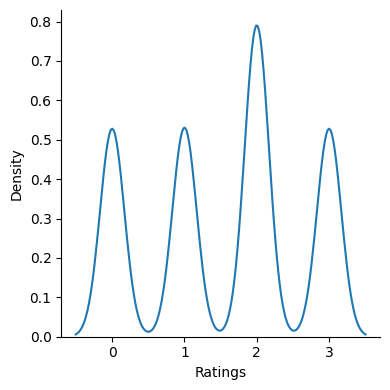

In [33]:
sns.displot(data=data, x='Ratings', kind='kde', aspect=1, height=4)

In [7]:
# Convert the dataframe into a pivot table
user_item_matrix = pd.pivot_table(data, index=data.index, columns='movieId', values='Ratings', fill_value=0)

In [8]:
# Convert the pivot table to a sparse matrix
user_item_matrix = csr_matrix(user_item_matrix.values)

In [34]:
# Train the KNN model using the sparse matrix
knn_model = NearestNeighbors(metric='cosine', algorithm='brute')
knn_model.fit(user_item_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

In [35]:
# Function to get movie recommendations for a user
def get_movie_recommendations(movie_id, num_recommendations):
    # Find the k nearest neighbors of the movie
    distances, indices = knn_model.kneighbors(user_item_matrix[movie_id], n_neighbors=num_recommendations+1)

    # Get the indices of the recommended movies
    recommended_movie_indices = indices.squeeze()[1:]

    # Get the titles of the recommended movies
    recommended_movie_titles = data.loc[recommended_movie_indices, 'title']

    return recommended_movie_titles

In [38]:
# Test the model by getting recommendations for a movie
movie_id = 48
num_recom=int(input("how many movie recommendations you want? = "))
print("-----------------------------------------------------")
print("here is the list of",num_recom,"movies for you based on movie_id",movie_id)
print("-----------------------------------------------------")
recommended_movies = get_movie_recommendations(movie_id,num_recom)
print(recommended_movies)

how many movie recommendations you want? = 4
-----------------------------------------------------
here is the list of 4 movies for you based on movie_id 48
-----------------------------------------------------
6886                    Ted Bundy (2002)
6885                49th Parallel (1941)
6887    District 13 (Banlieue 13) (2004)
6889                       Hostel (2005)
Name: title, dtype: object


In [37]:
# Assume the following are the actual ratings for the recommended movies by a user
actual_ratings = [0, 3, 2, 0, 1]

# Calculate the mean absolute error and root mean squared error
predicted_ratings = [data.loc[data['title'] == title, 'Ratings'].mean() for title in recommended_movies]

mae = mean_absolute_error(actual_ratings, predicted_ratings)
rmse = mean_squared_error(actual_ratings, predicted_ratings, squared=False)

print(f'Mean Absolute Error: {mae}')
print(f'Root Mean Squared Error: {rmse}')

Mean Absolute Error: 0.2
Root Mean Squared Error: 0.4472135954999579


As our dataset have range of ratings from 1 to 3 & achieved value of MAE & RMSE is 0.2 & 0.44, which means that predicted value is very close to actual value which is good.

In [39]:
#checking the accuracy  of the model
accuracy = 1 - (mae / max(actual_ratings))
print(f'Accuracy: {accuracy * 100}%')

Accuracy: 93.33333333333333%


Accuracy achieved will be be different everytime,if checked with changed actual ratings every time